### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2025 ###

# Optimized Meal Planning #

#### Keiji Toriumi (ktoriumi@wisc.edu), Myles Carpenter (mmcarpenter@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)

## 1. Introduction ##

Meal planning is a widespread issue for people all over the world. It is a difficult balance of getting enough nutrients, not wasting food, and spending as little money as possible. As someone planning how to buy ingredients for weekly grocery shopping, the question is what ingredients do you need to buy and what recipes should you make.

Given a set of recipes that you know and a set of ingredients that are available to buy from the grocery store, how can grocery shopping be optimized to save money. Given that a kitchen stores food from the past, constraints involving the amount of food that can be stored and how long it can be stored must be considered for a realistic model. A proper grocery shopping plan will also cover all necessary nutrients in a given week.

Important progress in this problem has been made in the past. George Stigler, an American economist, addressed the issue of how to minimize the cost of fulfilling all of a person's nutrition requirements given a list of food with known nutritional values (Stigler, 1945). This work was one of the earliest examples of an optimization problem. Stigler used a heuristic approach but developed the foundation for a problem that is solvable using modern optimization. This work is useful for people that go grocery shopping and wish to minimize the cost. It makes planning easier and more efficient.

Other researchers have modernized Stigler's work. Modern datasets and linear programming techniques gave more precise and thorough results (Garille, 2001). They have also extended the applicability of the data by performing the optimization with different circumstances for nutrition requirements. 

This work builds off of past work in fulfilling nutrition requirements using optimization techniques but also allows for meal planning across weeks, knowing that food can be stored in the fridge after being bought.

The model in this program will use a mix of synthetic and researched data. This model is highly customizable. Any recipes can be chosen but a set of recipes will be created by hand for the purpose of demonstration. Recipes will consist of fixed ratios of each ingredient in the database. These recipes will use real ingredients. We chose reasonable nutrition values(calories, carbs, protein, fats, fiber, vitamins, and minerals) based on information found at: (https://www.nutritionix.com/search?q=co). Initial(week 1) prices will be chosen based on a snapshot of current prices as of 08/05/2025 from: (https://www.metromarket.net/). As grocery prices fluctuate, we synthetically generated randomly and roughly increasing weekly grocery prices. Reasonable estimates for volume taken up by each ingredient will be made by hand.

Some simplifying assumptions for our model are as follows: We assume a consumer knows all future grocery prices from the start. We assume that recipes can be made in arbitrarily fractional amounts. In the linear model, it is assumed that items can be bought at scalar quantities for the same unit price.

This report showcases *****TWO***** optimization models. The first model uses all linear variables. For example, if a recipe calls for 3.5 eggs, this model will output a suggestion of buying exactly 3.5 eggs. This model is limited for many people since they buy ingredients from grocery stores where ingredients are sold in predetermined quantities. To address this issue, this report also explores a mixed integer program (MIP) that restricts the buying of ingredients to predetermined quantities. 

## 2. Mathematical model ##

The multiperiod-planning linear program uses a linear variable for the amount of each ingredient to buy. This is not possible in most cases since food is usually sold in predetermined quantities. This means that the optimal solution given by the linear program is not necessarily practical. The strength of the linear program lies in its ability to specify exactly how much is needed in cases where it is possible to get a non-whole number quantity of an ingredient.

The data used in the linear program:

$$
\begin{aligned}
T, \text{the set of discrete time periods} \\
I, \text{the set of ingredients that are available} \\
N, \text{the set of nutrients that are tracked} \\
R, \text{the set of known recipes} \\
F_{in}, \text{the amount of nutrient } n \text{ in ingredient i},\ \forall i \in I,\ n \in N \\
S_{n}, \text{the amount of nutrient } n \text{ that is needed each week for a healthy diet} \\
C_{i}, \text{the unit cost of ingredient } i,\ \forall i \in I \\
V_{i}, \text{the unit volume of ingredient } i,\ \forall i \in I \\
Fr, \text{the max volume of the fridge} \\
Req_{ir}, \text{the amount of ingredient i needed for recipe} \ r \ \forall i \in I, r \in R \\
\end{aligned}
$$

Decision variables:
- $x_{it}$, the amount of ingredient i to buy in week t, $\forall i \in I, t \in T$
- $y_{rt}$, the amount of recipe $l$ to make in week k, $\forall r \in R, t \in T$
- $z_{it}$, the amount of ingredient i to store in the fridge in week k, $\forall i \in I, t \in T$

The goal of this program is to minimize the total cost spent on grocery shopping. This corresponds to the sum of the amount of each ingredient bought multiplied by the unit cost of that ingredient.

The constraints appear in the program in the order that follows.

A key consideration of this program is fulfilling nutrient needs. The product of the amount of a recipe made, the unit amount of an ingredient needed in a recipe, and the unit amount of a nutrient in that ingredient represents the total amount of a nutrient given by a single ingredient in a single recipe.The sum of this product for all ingredients and every recipe is the total number of nutrients in a given week. The total number of nutrients must be greater than or equal to the required number of nutrients for every nutrient in every week.

As a multiperiod-planning problem, this program also involves storing food in a fridge to be used in later weeks. For practicality, the maximum volume of all ingredients in a given week that can be stored in the fridge is limited. This limit is recorded as Fr.

In order for this program to work, it is necessary to track the amount of each ingredient bought, consumed, and stored. First, it is important to establish the fact that at the start of the first week, the fridge is empty. The amount stored in the fridge is 0 for each ingredient.

After this is known, an ingredient balance can be calculated for each ingredient in each week. In each week, the amount of an ingredient available to use is the amount that was purchased and the amount that was stored in the fridge last week. Since ingredients cannot be created or destroyed, this must be exactly equal to the amount of the ingredient that was used for recipes and that was stored at the end of that week.

Finally, it is important to emphasize that negative quantities cannot be bought, consumed or sold.

The resulting multiperiod-planning linear program is as follows.

\begin{align}
\min \sum_{t \in T} \sum_{i \in I} x_{it} * C_i \\
\text{s.t. } \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} \geq S_{n}, \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} * V_{i} \leq Fr, \forall t \in T \\
z_{i0} = 0, \forall i \in I \\
x_{it} + z_{i,t-1} = \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}, \forall t \in T, i \in I \\
y_{rt}, x_{it}, z_{it} \geq 0, \forall i \in I, t \in T
\end{align}

This linear program can be converted into standard form. This requires changing the min to a max and changing the equalities to less than or equal to inequalities.

\begin{align}
\max \sum_{t \in T} \sum_{i \in I} -x_{it} * C_i \\
\text{s.t. } S_{n} \leq \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} , \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} * V_{i} \leq Fr, \forall t \in T \\
z_{i0} \leq 0, \forall i \in I \\
-z_{i0} \leq 0, \forall i \in I \\
x_{it} + z_{i,t-1} - \sum_{r \in R} y_{rt} * Req_{ir} - z_{it}\leq 0, \forall t \in T, i \in I \\
-x_{it} - z_{i,t-1} + \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}\leq 0, \forall t \in T, i \in I \\
y_{rt}, x_{it}, z_{it} \geq 0, \forall i \in I, t \in T
\end{align}

This multiperiod planning linear program can be converted into a multiperiod MIP. This will enable the user to choose ingredients based on predetermined sizes. The program remains the same except for two vital changes. First, the variable x is now a ****INTEGER**** variable. It represents the number of units of an ingredient to buy. V now represents the volume contained in one unit of an ingredient. 

\begin{align}
\max \sum_{t \in T} \sum_{i \in I} -x_{it} * C_i \\
\text{s.t. } S_{n} \leq \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} , \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} * V_{i} \leq Fr, \forall t \in T \\
z_{i0} \leq 0, \forall i \in I \\
-z_{i0} \leq 0, \forall i \in I \\
x_{it}*V_{i} + z_{i,t-1} - \sum_{r \in R} y_{rt} * Req_{ir} - z_{it}\leq 0, \forall t \in T, i \in I \\
-x_{it}*V_{i} - z_{i,t-1} + \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}\leq 0, \forall t \in T, i \in I \\
y_{rt}, z_{it} \geq 0, \forall i \in I, t \in T \\
x \text{ is an integer variable}
\end{align}

## 3. Solution ##

### Static costs (52 weeks)

This is our linear, multi-period planning model with fixed weekly costs.

In [213]:
using Random, NamedArrays, Plots

# DATA

T_end = 52 # Number of weeks
T = 1:T_end # Set of weeks
FR_CAP = 100 # Fridge capacity limit in oz.

N = [:calories, :protein, :fiber, :carbs, :fat, :vitamins, :minerals] # Nutrient set

        # nutrition requirements according to Google for average sized adult male
        # calories: 2000 kcals
        # protein: 55 g (bhf.org.uk)
        # fiber: 40 g (health.harvard.edu)
        # carbs: 130 g (mayoclinic.org)
        # fat:50
        # vitamins: artificially chosen
        # minerals: artificially chosen
S = NamedArray([2000, 55, 40, 100, 10, 20, 20], N, "Nutrient Requirements") # Weekly nutrition requirements

# INGREDIENT DATA
I = [:rice, :chicken, :steak, :noodles, :cream, :tomato, :asparagus, :bread, :tofu, :banana, :yogurt, :cereal] # Ingredient Set

Cinit = NamedArray([.1, .375, .9375, .08, .30, .1369, .2369, .16, .14, .0431, .20, .36], I, "Ingredients") # Cost of an ingredient in dollars / oz
C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))

for i in 1:length(I), t in 1:length(T)
    C[t, i] = Cinit[i]
end

# g / oz
F = NamedArray([37 .76 .11 8 .08 1 1;
        47 8.8 0 0 1 .25 3;
        53 8.3 0 0 2.2 .25 3.5;
        45 1.6 .51 8.7 .26 0 .5;
        96 .81 0 .81 10.2 1 1;
        5 .25 .34 1.1 .06 3 1.5;
        6 .62 .6 1.1 .03 2 2;
        76 2.5 .77 14 .95 0 1.5;
        41 4.9 .65 .79 2.5 1 3;
        25 .31 .74 6.5 .09 1.5 3.5;
        17 .98 0 1.3 .92 .5 1.25;
        92 2.2 3.9 22.4 .45 .75 3;
        ], (I, N), ("Ingredients", "Nutrients"))

# INGREDIENT DATA

# RECIPE DATA
R = [:steak_rice_asparagus, :chicken_ceasar_salad, :chicken_marinara, 
    :steak_alfredo, :banana_toast, :overnight_oats, :stirfried_tofu, :clamless_chowder, :CLT]

# Each recipe uses about 10 total units of ingredient
Req = NamedArray([  5 0 3 0 0 0 3 0 0 0 0 0; # steak rice aspargus
                    0 3 0 0 0 2 2 0 0 0 1 0; # chicken ceasar salad
                    0 2 0 5 0 3 0 0 0 0 0 0; # chicken marinara
                    0 0 3 5 2 0 0 0 0 0 0 0; # streak alfredo
                    0 0 0 0 0 0 0 1 0 1 0 0; # banana toast
                    0 0 0 0 0 0 0 0 0 1 1 3; # overnight oats
                    1 0 0 0 0 0 1 0 1 0 0 0; # stirfried tofu
                    0 1 0 0 3 0 0 1 0 0 0 0; # clamless chowder
                    0 1 0 0 0 1 0 1 0 0 0 0; # chicken lettuce tomato
                    ],
                    (R, I), ("Recipes", "Ingredients")) 
#RECIPE DATA


# MODEL
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[T, I] >= 0)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

# Indexing Guide:
#
# t - time, i - ingredient, r - recipe, n - nutrient
# x[t, i], y[t, r], Req[r, i], F[i, n]

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( (x[t, i])  for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * Cinit[i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t, i])) for t in T, i in I ], (T, I), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Recipes", "Week"))

plot_MODEL1_weekly_costs = plot(permutedims(String.(I)), permutedims(Cinit), xlabel="Ingredient", ylabel="(\$/oz)", ylims=(0, 1), markershape=:circle, legend=false, seriestype=:scatter)

plot_MODEL1_ingredients_bought = plot(T, ingredient_values, xlabel="Time (week)", ylabel="Quantity Bought (oz)" , label=permutedims(String.(I)))
plot_MODEL1_recipes_cooked = plot(T, recipe_values, xlabel="Time (week)", ylabel="Quantity Recipe Cooked (portion)" , label=permutedims(String.(R)))

objval_MODEL1 = objective_value(m)

;

### Randomly Changing Weekly Costs Seed 1 (52 weeks)

This is our linear multi-period planning model with roughly increasing weekly costs. 

In [214]:
# for now leave out multi-period planning and general form - too complex
using Random, NamedArrays, Plots

T_end = 52
T = 1:T_end
FR_CAP = 100

#Data 2:
Random.seed!(299)

# INGREDIENT DATA
I = [:rice, :chicken, :steak, :noodles, :cream, :tomato, :asparagus, :bread, :tofu, :banana, :yogurt, :cereal]

Cinit = [.1, .375, .9375, .08, .30, .1369, .2369, .16, .14, .0431, .20, .36] # dollars / oz
C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))

# g / oz
F = NamedArray([37 .76 .11 8 .08 1 1;
        47 8.8 0 0 1 .25 3;
        53 8.3 0 0 2.2 .25 3.5;
        45 1.6 .51 8.7 .26 0 .5;
        96 .81 0 .81 10.2 1 1;
        5 .25 .34 1.1 .06 3 1.5;
        6 .62 .6 1.1 .03 2 2;
        76 2.5 .77 14 .95 0 1.5;
        41 4.9 .65 .79 2.5 1 3;
        25 .31 .74 6.5 .09 1.5 3.5;
        17 .98 0 1.3 .92 .5 1.25;
        92 2.2 3.9 22.4 .45 .75 3;
        ], (I, N), ("Ingredients", "Nutrients"))

# INGREDIENT DATA

N = [:calories, :protein, :fiber, :carbs, :fat, :vitamins, :minerals]

R = [:steak_rice_asparagus, :chicken_ceasar_salad, :chicken_marinara, 
    :steak_alfredo, :banana_toast, :overnight_oats, :stirfried_tofu, :clamless_chowder, :CLT]

# Each recipe uses about 10 total units of ingredient
Req = NamedArray([  5 0 3 0 0 0 3 0 0 0 0 0; # steak rice aspargus
                    0 3 0 0 0 2 2 0 0 0 1 0; # chicken ceasar salad
                    0 2 0 5 0 3 0 0 0 0 0 0; # chicken marinara
                    0 0 3 5 2 0 0 0 0 0 0 0; # streak alfredo
                    0 0 0 0 0 0 0 1 0 1 0 0; # banana toast
                    0 0 0 0 0 0 0 0 0 1 1 3; # overnight oats
                    1 0 0 0 0 0 1 0 1 0 0 0; # stirfried tofu
                    0 1 0 0 3 0 0 1 0 0 0 0; # clamless chowder
                    0 1 0 0 0 1 0 1 0 0 0 0; # chicken lettuce tomato
                    ],
                    (R, I), ("Recipes", "Ingredients")) 

# nutrition requirements according to Google for average sized adult male
# calories: 2000 kcals
# protein: 55 g (bhf.org.uk)
# fiber: 40 g (health.harvard.edu)
# carbs: 130 g (mayoclinic.org)
# fat:50
# vitamins:
# minerals: 
S = NamedArray([2000, 55, 40, 100, 10, 20, 20], N, "Nutrient Requirements")

# VARIABLE PRICES

UNCERTAINTY = .0324
UNIT_COST_INCREASE = .0215 # https://www.bls.gov/cpi/tables/variance-estimates/
                           # 2024 CPI Variance Estimates 
                           # 2.21% / 52 ~= .0215 - average weekly inflation of food at home items in 2024
                           # .18^2 = .0324 - variance of sample in this study

for i in 1:length(I)
    C[1, i] = Cinit[i]
end

for t in 2:length(T)
    for i in 1:length(I)
        C[t, i] = C[t - 1, i] + UNCERTAINTY * Random.rand(-1:1) + UNIT_COST_INCREASE * C[t - 1, i]
        if C[t, i] <= .01
            C[t, i] = .05
        end
    end
end

#STATIC PRICES
# for t in T, i in 2:length(I)
#     C[t, i] = C[1, i]
# end


# make the model
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[T, I] >= 0)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

# Indexing Guide:
#
# t - time, i - ingredient, r - recipe, n - nutrient
# x[t, i], y[t, r], Req[r, i], F[i, n]

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( (x[t, i])  for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t, i])) for t in T, i in I ], (T, I), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Recipes", "Week"))

plot_MODEL2_weekly_costs = plot(T, C, xlabel="Time (week)", ylabel="Cost (\$/oz)" , label=permutedims(String.(I)))

plot_MODEL2_ingredients_bought = plot(T, ingredient_values, xlabel="Time (week)", ylabel="Quantity Bought (oz)" , label=permutedims(String.(I)))


plot_MODEL2_recipes_cooked = plot(T, recipe_values, xlabel="Week", ylabel="Quantity Recipe Cooked (portion)" , label=permutedims(String.(R)))

objval_MODEL2 = objective_value(m)

;

### Randomly Changing Weekly Costs Seed 2 (52 weeks)

This is our linear multi-period planning model with roughly increasing weekly costs. 

In [215]:
# for now leave out multi-period planning and general form - too complex
using Random, NamedArrays, Plots

T_end = 52
T = 1:T_end
FR_CAP = 100

#Data 2:
Random.seed!(305)

# INGREDIENT DATA
I = [:rice, :chicken, :steak, :noodles, :cream, :tomato, :asparagus, :bread, :tofu, :banana, :yogurt, :cereal]

Cinit = [.1, .375, .9375, .08, .30, .1369, .2369, .16, .14, .0431, .20, .36] # dollars / oz
C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))

# g / oz
F = NamedArray([37 .76 .11 8 .08 1 1;
        47 8.8 0 0 1 .25 3;
        53 8.3 0 0 2.2 .25 3.5;
        45 1.6 .51 8.7 .26 0 .5;
        96 .81 0 .81 10.2 1 1;
        5 .25 .34 1.1 .06 3 1.5;
        6 .62 .6 1.1 .03 2 2;
        76 2.5 .77 14 .95 0 1.5;
        41 4.9 .65 .79 2.5 1 3;
        25 .31 .74 6.5 .09 1.5 3.5;
        17 .98 0 1.3 .92 .5 1.25;
        92 2.2 3.9 22.4 .45 .75 3;
        ], (I, N), ("Ingredients", "Nutrients"))

# INGREDIENT DATA

N = [:calories, :protein, :fiber, :carbs, :fat, :vitamins, :minerals]

R = [:steak_rice_asparagus, :chicken_ceasar_salad, :chicken_marinara, 
    :steak_alfredo, :banana_toast, :overnight_oats, :stirfried_tofu, :clamless_chowder, :CLT]

# Each recipe uses about 10 total units of ingredient
Req = NamedArray([  5 0 3 0 0 0 3 0 0 0 0 0; # steak rice aspargus
                    0 3 0 0 0 2 2 0 0 0 1 0; # chicken ceasar salad
                    0 2 0 5 0 3 0 0 0 0 0 0; # chicken marinara
                    0 0 3 5 2 0 0 0 0 0 0 0; # streak alfredo
                    0 0 0 0 0 0 0 1 0 1 0 0; # banana toast
                    0 0 0 0 0 0 0 0 0 1 1 3; # overnight oats
                    1 0 0 0 0 0 1 0 1 0 0 0; # stirfried tofu
                    0 1 0 0 3 0 0 1 0 0 0 0; # clamless chowder
                    0 1 0 0 0 1 0 1 0 0 0 0; # chicken lettuce tomato
                    ],
                    (R, I), ("Recipes", "Ingredients")) 

# nutrition requirements according to Google for average sized adult male
# calories: 2000 kcals
# protein: 55 g (bhf.org.uk)
# fiber: 40 g (health.harvard.edu)
# carbs: 130 g (mayoclinic.org)
# fat:50
# vitamins:
# minerals: 
S = NamedArray([2000, 55, 40, 100, 10, 20, 20], N, "Nutrient Requirements")

# VARIABLE PRICES

for i in 1:length(I)
    C[1, i] = Cinit[i]
end

for t in 2:length(T)
    for i in 1:length(I)
        C[t, i] = C[t - 1, i] + UNCERTAINTY * Random.rand(-1:1) + .005 * C[t - 1, i]
        if C[t, i] <= .01
            C[t, i] = .05
        end
    end
end

#STATIC PRICES
# for t in T, i in 2:length(I)
#     C[t, i] = C[1, i]
# end


# make the model
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[T, I] >= 0)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

# Indexing Guide:
#
# t - time, i - ingredient, r - recipe, n - nutrient
# x[t, i], y[t, r], Req[r, i], F[i, n]

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( (x[t, i])  for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t, i])) for t in T, i in I ], (T, I), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Recipes", "Week"))

plot_MODEL3_weekly_costs = plot(T, C, xlabel="Time (week)", ylabel="Cost (\$/oz)" , label=permutedims(String.(I)))

plot_MODEL3_ingredients_bought = plot(T, ingredient_values, xlabel="Time (week)", ylabel="Quantity Bought (oz)" , label=permutedims(String.(I)))


plot_MODEL3_recipes_cooked = plot(T, recipe_values, xlabel="Time (week)", ylabel="Quantity Recipe Cooked (portion)" , label=permutedims(String.(R)))

objval_MODEL3 = objective_value(m)

;

## 4. Results and discussion ##

So far, a multiperiod planning linear program has been written. It includes descriptions of the data and variables that will be used. A basic linear program has been implemented in Julia that optimizes ingredient selection for a single week using known recipes. It fulfills nutrition requirements and minimizes cost. It is a basic model that can be added on to create the full multiperiod planning model. 

The remaining tasks to be done and rough timelines:
- Upgrade the Julia code to function as a multiperiod planning linear program (7/30)
- Decide on how to incentivize storing food (7/31) 
- Decide on further improvements to the mode (integer constraints, MCNF, etc.)l (8/02)
- Create full dataset for the program (8/03)

### 4.A. Feel free to add subsections

**Issues/Concerns**
1. Many of the variables should be integers. Many ingredients can only be bought from a store in fixed amounts, thought ingredients can be kept as a fractional amount in the fridge/pantry. Recipes can be difficult to scale by fractional amounts, though scaling recipes by an integer is always straightforward. Two approaches that would help with these concerns are integer programming techniques and formulating the problem as a Min-Cost Network Flow Problem with unimodular data matrices.
2. It may make sense to add a tradeoff variable. The MAX recipes per week variable is a constraint that could be itself optimized. Same thing for the recipes. Substituting ingredients and tweaking the proportions are realistic things a cook do to account for dietary restrictions, ingredient scarcity, flavor preference, etc.
3. Ingredient costs may fluctuate over time. It may make sense to further complicate the data and change $C_i$ to $C_{ik} \ (i \in I, k \in T)$
4. Assuming 3 is implemented, it is not realistic to know every future price fluctuation in advance. Therefore it makes more sense to create a model that is blind to future conditions.
5. There are conceivable situations where there is no solutions(for example, a vegan may struggle to reach protien nutrient constraint if there is a lack of special ingredients in the market)

**Possible Approaches for concerns**
1. The next couple weeks of lecture may enlighten us on new techniques to approach problems with an integer constraint. It will take some mental work to re-imagine the problem as combinatorial, but that seems like a goal that can be reasonable achieved by the deadline. The fact that inventory can be stored in fractional amounts is already accounted for in the existing model.

2. This seems like less of a priority for our project than other issues, but I think this would be useful for an end user using our model.

3. As we move on to generating data with scripts rather that hand-typing, we will see how cost-change over time makes data-creation more complex.

4. This seems like a possible application of stochastic programming, which I know almost nothing about and may be beyond the scope of this class. I wonder if there is a way to force the model to only consider only the next $t \leq |T|$ time slices, using only constraints.

5. We can use least-squares techniques to find the diet that gets someone as close to the nutrient requirements as possible.
#### 4.A.a. or subsubsections

Future ideas:
- It had a huge spike at the end. This suggests that it was using all of the leftover ingredients that it was forced to buy all at once. Since storing the food in the fridge is free and there is no incentive to eat more than necessary, I believe that there is a range of possible solutions. It could have left all of the food in the fridge or it could have eaten all that was left. It could have also more evenly distributed this food over the week. The question becomes how to manage this so that the program doesn't crash to 0 of each ingredient right at the end. Is there a preferable way to handle this situation?

### Static Cost Multi-Period Programming Model

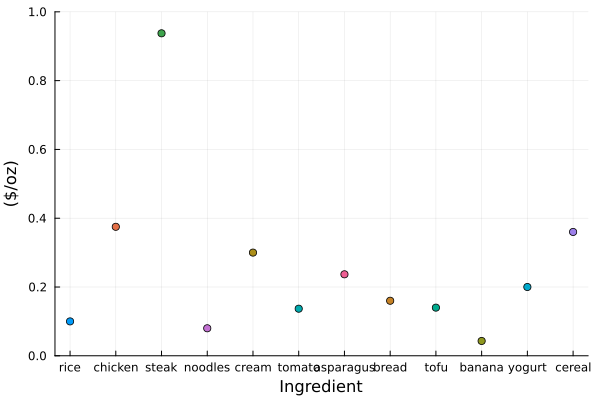

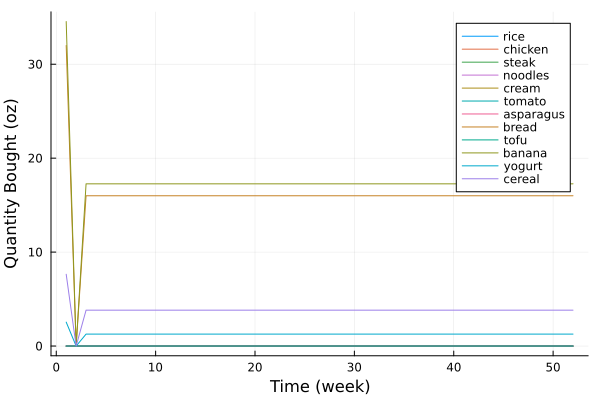

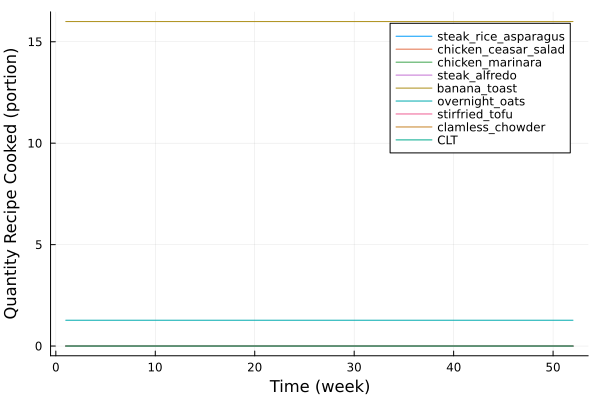

Optimal Cost: $256.58

In [216]:
using Printf

display(plot_MODEL1_weekly_costs)

display(plot_MODEL1_ingredients_bought)

display(plot_MODEL1_recipes_cooked)

@printf("%s%0.2f", "Optimal Cost: \$", round(objval_MODEL1, digits=2))

### Randomly Changing Weekly Costs Seed 1


Weekly Costs:


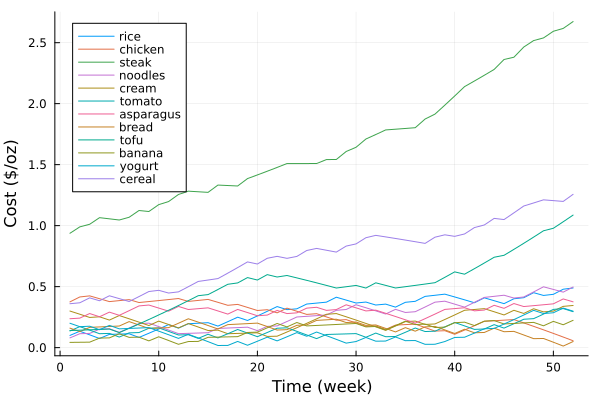

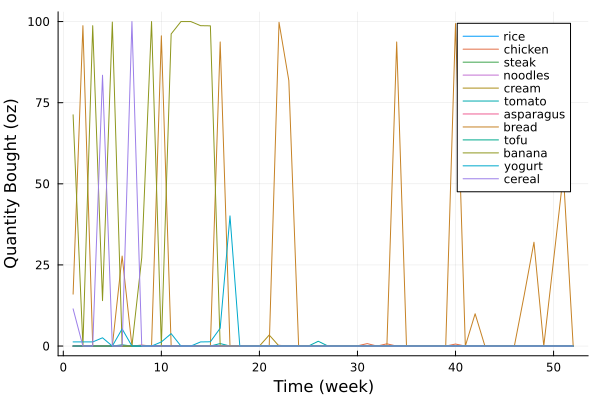

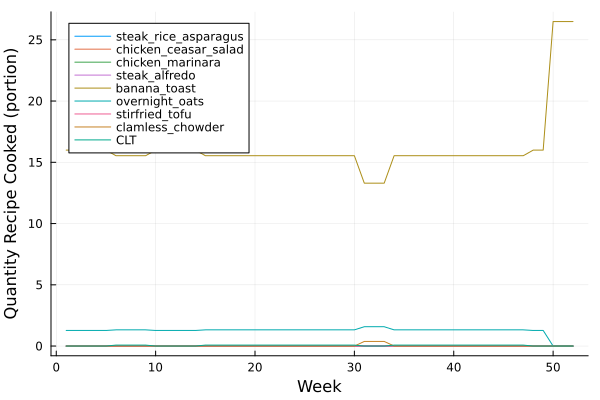

Optimal Cost: $237.23

In [217]:
println()
println("Weekly Costs:")
display(plot_MODEL2_weekly_costs)

display(plot_MODEL2_ingredients_bought)

display(plot_MODEL2_recipes_cooked)

@printf("%s%0.2f", "Optimal Cost: \$", round(objval_MODEL2, digits=2))

### Randomly Changing Weekly Costs Seed 2


Weekly Costs:


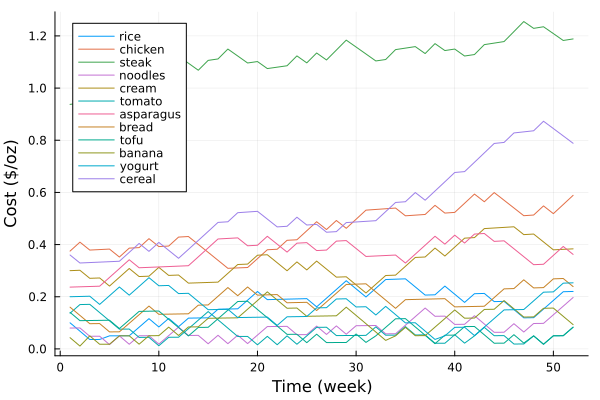

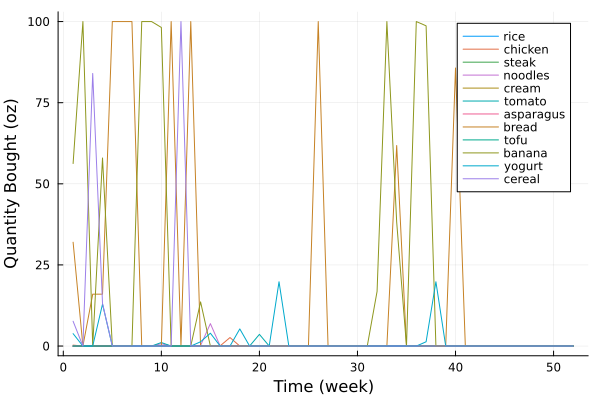

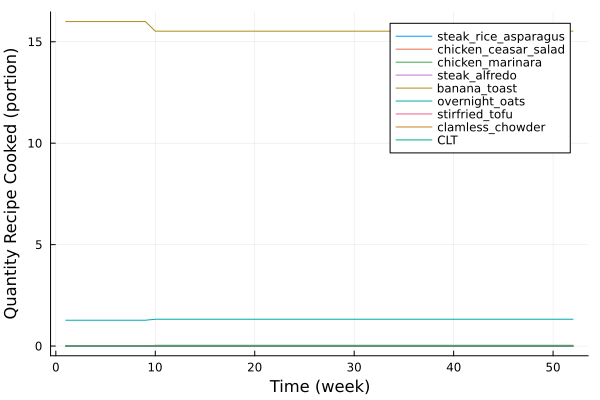

Optimal Cost: $207.90

In [218]:
println()
println("Weekly Costs:")
display(plot_MODEL3_weekly_costs)

display(plot_MODEL3_ingredients_bought)

display(plot_MODEL3_recipes_cooked)

@printf("%s%0.2f", "Optimal Cost: \$", round(objval_MODEL3, digits=2))

## 6. Conclusion ##

*Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.*

From the results we gathered, our models are very sensitive to changes in price. Initial dives into future work should certainly look into making the generation of cost model more accurate, especially over time. Our model does adapt well to price fluctuations. Our model is also general, in that it can be used with or without future price fluctuations in mind.

## 7. References ##

George J. Stigler, (1945), Journal of Farm Economics. Vol. 27, No. 2, pp. 303-314, Oxford University Press
https://doi.org/10.2307/1231810

Susan Garner Garille, Saul I. Gass, (2001) Stigler's Diet Problem Revisited. Operations Research 49(1):1-13.
https://doi.org/10.1287/opre.49.1.1.11187